In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ IN THE DATA SET

In [3]:
df=pd.read_csv(r"C:\Users\UsEr\Downloads\Bank Dataset\bank_marketing_updated_v1.csv")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# DATA CLEANING

In [4]:
df=pd.read_csv(r"C:\Users\UsEr\Downloads\Bank Dataset\bank_marketing_updated_v1.csv",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


 Droping Customer Id


In [5]:
df.drop("customerid",axis=1,inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Dividing jobedu into job and education

In [6]:
df['job']=df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [16]:
df['edu']=df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
df.drop("jobedu" , axis=1 , inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


####Extract the value of the month from the table

In [8]:
df.month=df.month.apply(lambda x : x.split(",")[0])
df.head()

AttributeError: 'float' object has no attribute 'split'

In [21]:
df[df.month.apply(lambda x: isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


Checking for missing values


In [10]:
df.isnull().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
dtype: int64

Handling The missing values

In [9]:
df.age.isnull().sum()


20

In [11]:
df1=df[~df.age.isnull()].copy()
df1.shape

(45191, 18)

In [12]:
df1.age.isnull().sum()

0

Handling Missing value for month

In [13]:
df1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [14]:
month_mode=df1.month.mode()[0]
month_mode

'may, 2017'

In [15]:
df1.month.fillna(month_mode , inplace=True)
df1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [16]:
df1.month.isnull().sum()

0

In [17]:
df1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
dtype: int64

In [18]:
response_mode=df1.response.mode()[0]
response_mode

'no'

In [19]:
df1.response.fillna(response_mode , inplace=True)
df1.response.value_counts(normalize=True)

no     0.883052
yes    0.116948
Name: response, dtype: float64

In [20]:
df1.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
dtype: int64

In [21]:
df1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Here -1 indicates that there is no value it means it indicates there is a missing values

How we Handle This
Remember our objective
-We want the missing values to be ignored in the calculation
-simply make it missing or -1 with NAN
-all summary statistics mean,median..etc will ignore the missing values


In [22]:
df1.loc[df1.pdays<0,"pdays"]=np.NAN
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Missing value always doesn't present as null

Out liers handling

Age Varriable

In [23]:
df1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

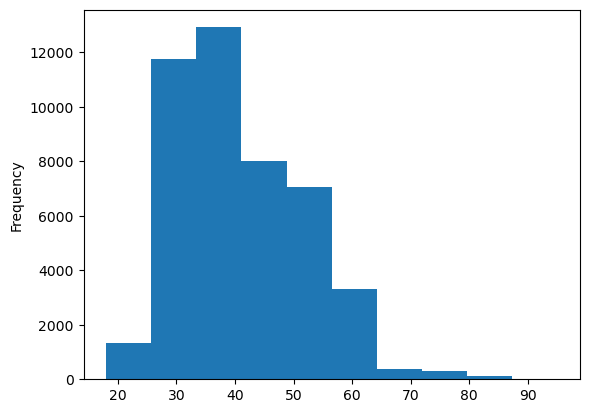

In [24]:
df1.age.plot.hist()
plt.show()

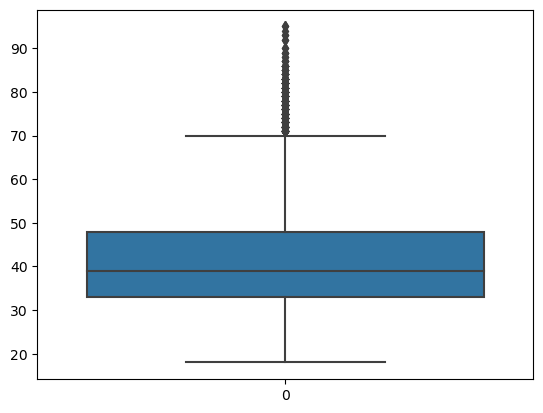

In [25]:
sns.boxplot(df1.age)
plt.show()

you have seen that the age variable has outliers, 
but these can be treated as the normal values of age because any person can be over 70 or 80 years of age.
Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, 
which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

 

##Balance Varriable

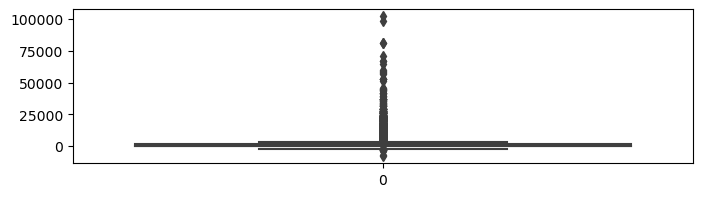

In [26]:
plt.figure(figsize=[8,2])
sns.boxplot(df1.balance)
plt.show()

In [27]:
df1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [28]:
df1[df1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


An important aspect that has been covered in this video is quantiles. 
Sometimes, it is beneficial if you look into the quantiles instead of the box plot, 
mean or median. Quantile may give you a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, 
then there are outliers in the data set.

##STANDARDIZE VARRIABLE

In [29]:
df1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [30]:
df1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [31]:
df1.duration=df1.duration[:5].apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [32]:
df1.duration.describe()

count    5.000000
mean     2.593333
std      1.272279
min      1.266667
25%      1.533333
50%      2.516667
75%      3.300000
max      4.350000
Name: duration, dtype: float64

In [33]:
df1.dtypes

age         float64
salary        int64
balance       int64
marital      object
targeted     object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration    float64
campaign      int64
pdays       float64
previous      int64
poutcome     object
response     object
job          object
dtype: object

univariate Analysis-Categorical features
marital
-

In [34]:
df1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [35]:
df1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

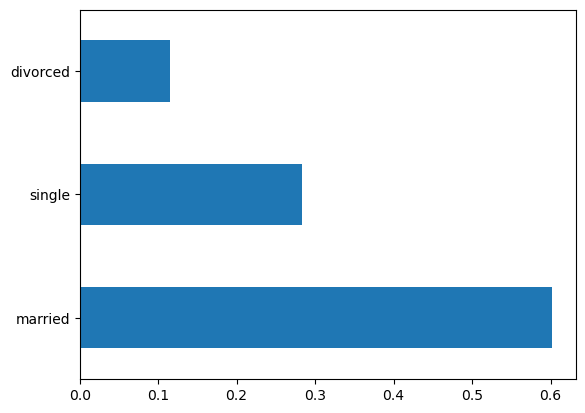

In [36]:
df1.marital.value_counts(normalize=True).plot.barh()
plt.show()

You have seen that there is a variable called "marital" in the Bank Marketing dataset. 
This is categorical unordered variable. You have seen that the bank has contacted mostly married people, 
as can be seen in the image below.

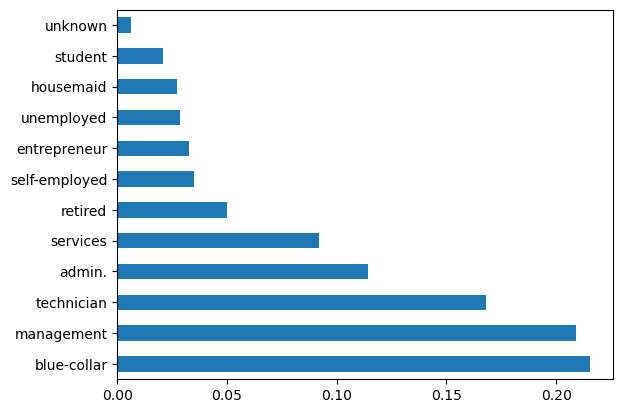

In [37]:
df1.job.value_counts(normalize=True).plot.barh()
plt.show()

In [39]:
df1.edu.value_counts(normalize=True).plot.pie()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'edu'

There is a variable called "education" in the Bank Marketing dataset. 
This is a categorical ordered variable because there is ordering of education levels,
like primary, secondary and tertiary education. You have seen that the bank has mostly contacted people
who have completed secondary education, 
as can be seen in the image below.

Poutcome varriables

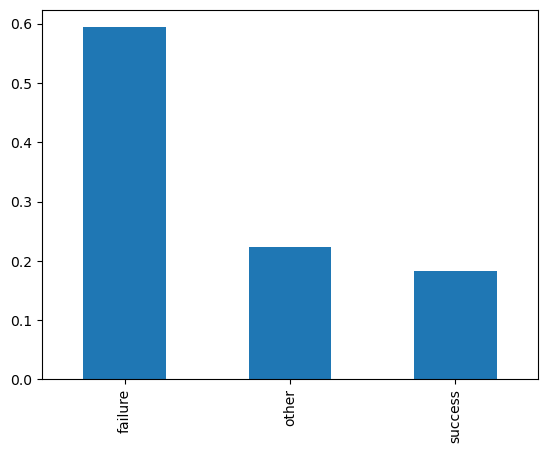

In [107]:
df1[~(df1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

Response = Target Varriable

In [108]:
df1.response.value_counts(normalize=True)

no     0.883052
yes    0.116948
Name: response, dtype: float64

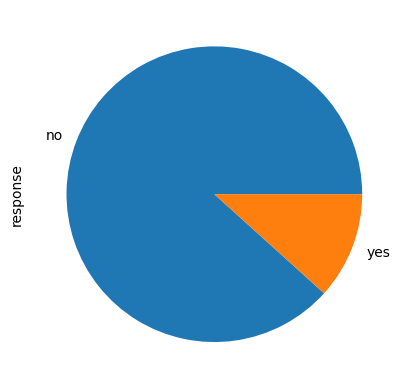

In [109]:
df1.response.value_counts(normalize=True).plot.pie()
plt.show()

Let’s summarise the major takeaways from the above video:

You have seen that education, poutcome and response are the ordered categorical variables. 

The bank has primarily contacted those customers who have completed their secondary education.
You can observe that in the pie chart below:

For the majority of the customers, the previous campaign has not been conducted. 
Refer to the bar graph below to understand more about the 'poutcome' variable. 
As you can see, 'unknown' has the major share within the 'poutcome' variable.

Bi-Variate Analysis

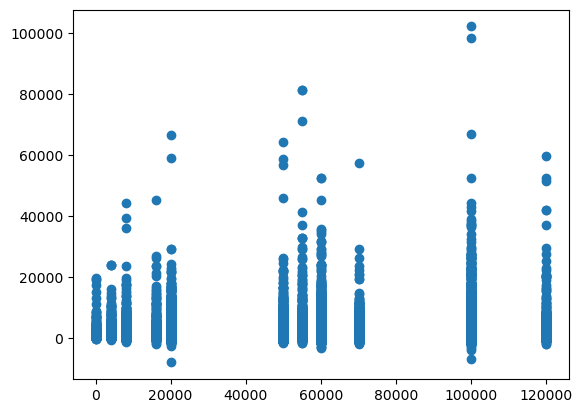

In [111]:
plt.scatter(df1.salary , df1.balance)
plt.show()

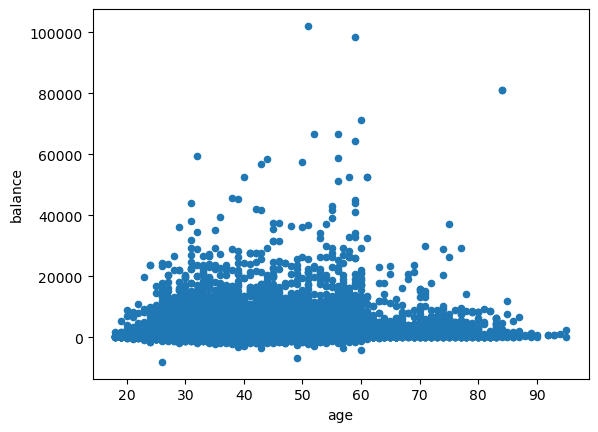

In [113]:
df1.plot.scatter(x="age",y="balance")
plt.show()

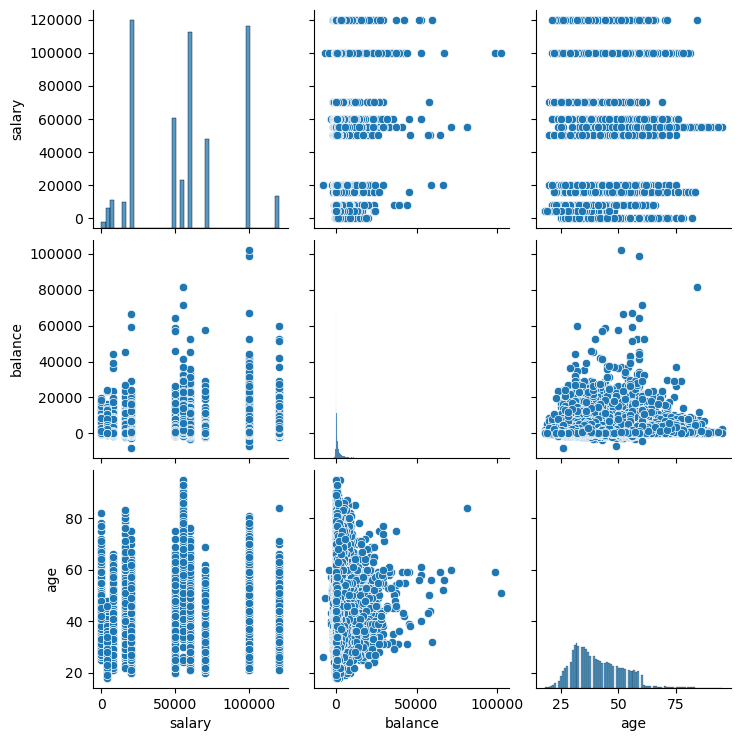

In [117]:
sns.pairplot(data=df1 , vars=["salary" , "balance" , "age"])
plt.show()

Quantify using corelation value

In [121]:
df1[["age" , "salary" ,"balance"]].corr()


,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


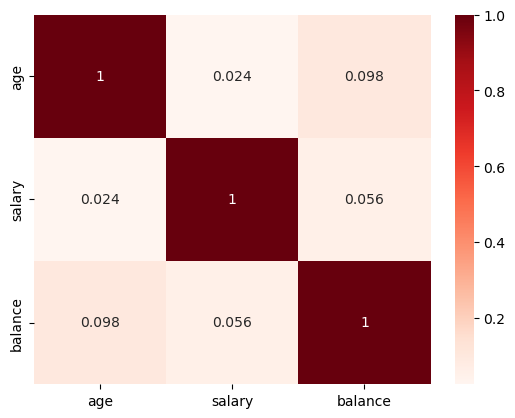

In [124]:
sns.heatmap(df1[["age" , "salary" ,"balance"]].corr() , annot=True ,cmap="Reds")
plt.show()

Catogorical-numerical

In [125]:
df1.groupby("response")["salary"].mean()

response
no     56770.96176
yes    58780.51088
Name: salary, dtype: float64

In [126]:
df1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

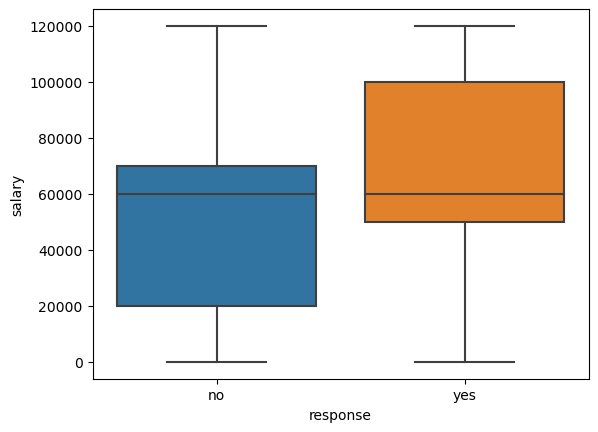

In [127]:
sns.boxplot(data=df1 , x="response" ,y="salary")
plt.show()

Response vs Balance
we know the balance is highly skewed - has very high value

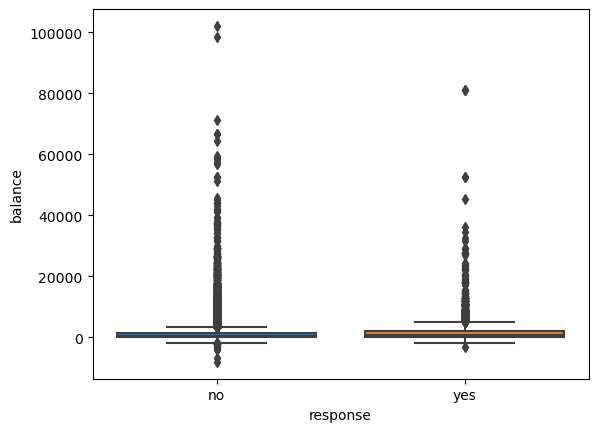

In [128]:
sns.boxplot(data=df1 , x="response" ,y="balance")
plt.show()

In [129]:
df1.groupby("response")["balance"].mean()

response
no     1303.862752
yes    1804.681362
Name: balance, dtype: float64

In [130]:
df1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

75th percentile

In [131]:
def p75(x):
    return np.quantile(x, 0.75)

In [132]:
df1.groupby('response')['balance'].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1303.862752,417.0,1345.0
yes,1804.681362,733.0,2159.0


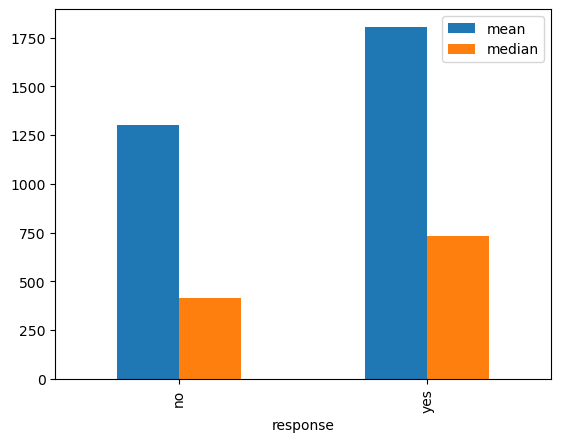

In [134]:
df1.groupby('response')['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

Catogorical-catogorical

In [136]:
df1['response_flag'] = np.where(df1.response=="yes" , 1,0)

In [138]:
df1.response_flag.value_counts(normalize=True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [139]:
df1.response_flag.mean()

0.11694806488017526

Education vs Response rate

In [143]:
df1.groupby(['edu'])['response_flag'].mean()

edu
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

Material vs response value

In [147]:
df1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

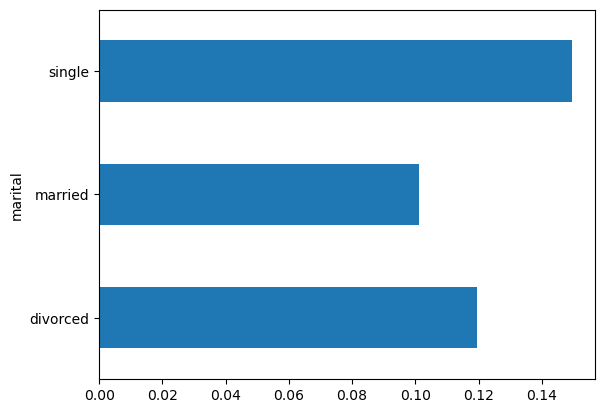

In [149]:
df1.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

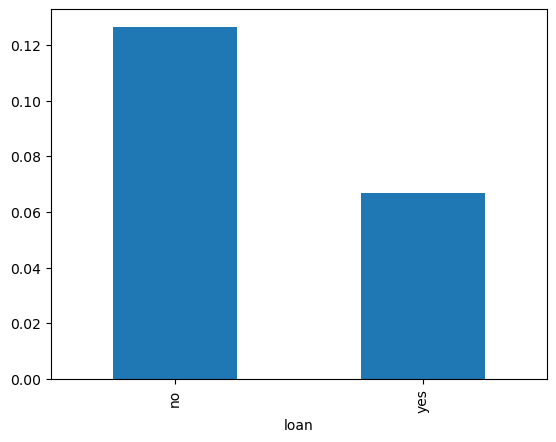

In [150]:
df1.groupby(['loan'])['response_flag'].mean().plot.bar()
plt.show()

#Age vs Response

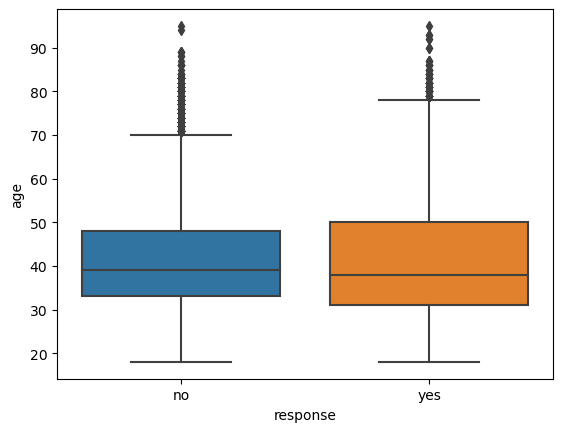

In [154]:
sns.boxplot(data=df1,x="response",y="age")
plt.show()

Making buckets from the age coloum

In [156]:
?pd.cut

In [157]:
pd.cut(df1.age[:5], [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [160]:
df1['age_group'] = pd.cut(df1.age[:5], [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

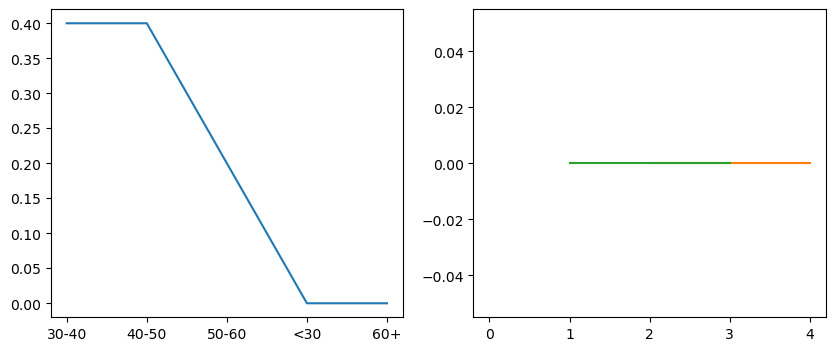

In [164]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df1.age_group.value_counts(normalize=True).plot()
plt.subplot(1,2,2)
df1.groupby(['age_group'])['response_flag'].plot()
plt.show()

So, age group analysis showed that people in the age group of 
60+ or <30 are more likely to respond positively. It may be true for older people,
since they want to invest through more secure investment methods such as term deposits to have a secure old age.